In [63]:
import pandas as pd
import numpy as np
import seaborn as sn
fib_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE113nnn/GSE113957/suppl/GSE113957_fpkm.txt.gz'
# stem https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE73211

In [64]:
fib=pd.read_table(fib_file,index_col=0)
fib.shape

(27142, 150)

In [65]:
fib=fib.iloc[:,7:]
fib.shape

(27142, 143)

In [66]:
HGPS=['139_8_Female-HGPS_Caucasian','141_8_Male-HGPS_Unknown','197_2yr3mos_F_Unknown','198_3yr9mos_F_Unknown',
      '199_4yr8mos_F_Unknown','200_8yr6mos_M_Unknown','201_6ys11mos_F_Unknown','202_5yr0mos_F_Unknown',
      '203_8yr10mos_M_Unknown','204_3yr0mos_F_Unknown']
fib=fib[[c for c in fib.columns if c not in HGPS]]
fib.shape

(27142, 133)

In [67]:
df=pd.read_table('../data/rna/refseq.txt',index_col=0)
df['ref']=(df['RefSeq mRNA ID'].astype(str)+df['RefSeq ncRNA ID'].astype(str))
df['ref']=df.ref.str.strip('nan')
df=df[df.ref!='']
df=fib.merge(df[['Gene name','ref']],left_index=True,right_on='ref').drop('ref',1)
df.shape

(27493, 134)

In [68]:
df=df[df.median(1)>1]
df.shape

(11733, 134)

In [69]:
df[df['Gene name']=='TOR1AIP1']

,101_19yr_Female_Caucasian,102_19yr_Male_Caucasian,103_19yr_Male_Caucasian,104_19yr_Male_Caucasian,105_20yr_Male_Caucasian,106_20yr_Female_Caucasian,107_31yr_Female_Caucasian,108_31_female_Caucasian,109_32_male_Unknown,110_32_female_BlackPuertoRican,...,90_10yr_Male_Black,91_10yr_Male_Caucasian,92_11_female_Caucasian,93_11_female_Caucasian,94_12_male_Caucasian,95_13yr_Male_WhiTEEASTINDIAN,97_16yr_Female_Unknown,98_17yr_Male_Caucasian,99_17yr_Male_Caucasian,Gene name
Transcript stable ID,,,,,,,,,,,,,,,,,,,,,
ENST00000528443,16.051,13.222,14.483,14.638,14.511,15.461,14.084,13.536,17.385,13.248,...,14.509,16.061,11.137,13.672,12.933,18.067,15.486,13.1,13.791,TOR1AIP1


In [70]:
#fib=df.groupby('Gene name').sum()
fib=df.drop('Gene name',1)
ages=fib.columns.str.split('_').str[1].str.strip('mos').str.strip('yr').str.strip('YR').tolist()
ages=[int(a[0]) if 'yr' in a or 'ys' in a else int(a) for a in ages]
fib=fib.T
fib=np.log10(fib+1)

In [71]:
fib['age']=ages

<AxesSubplot:xlabel='age', ylabel='ENST00000528443'>

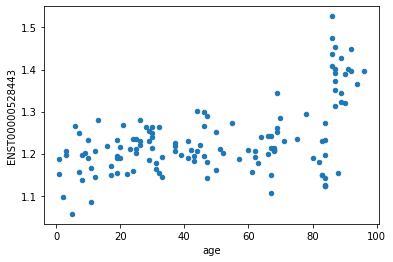

In [72]:
fib.plot.scatter('age','ENST00000528443')

In [73]:
fib['age'].sort_values().tail(10)

74_89_Male_Caucasian      89
133_89_Male_Caucasian     89
130_89_Male_Caucasian     89
75_90_Male_Caucasian      90
132_90_Male_Caucasian     90
76_91_Male_Caucasian      91
77_92_Female_Caucasian    92
135_92_Male_Caucasian     92
129_94_Male_Caucasian     94
78_96_Male_Caucasian      96
Name: age, dtype: int64

<AxesSubplot:title={'center':'ECM2'}, xlabel='age', ylabel='ENST00000344604'>

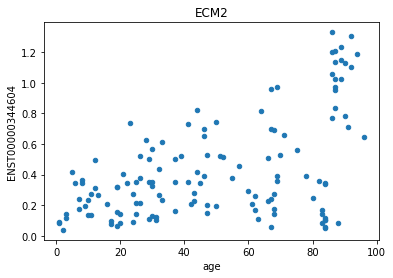

In [74]:
fib.plot.scatter('age','ENST00000344604',title='ECM2')

<AxesSubplot:title={'center':'SVEP1'}, xlabel='age', ylabel='ENST00000374469'>

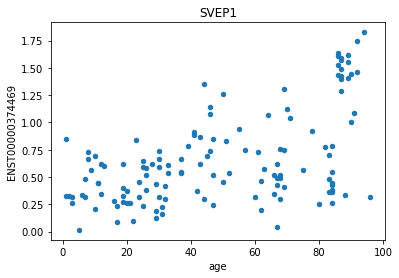

In [75]:
fib.plot.scatter('age','ENST00000374469',title='SVEP1')

<AxesSubplot:xlabel='ENST00000344604', ylabel='ENST00000374469'>

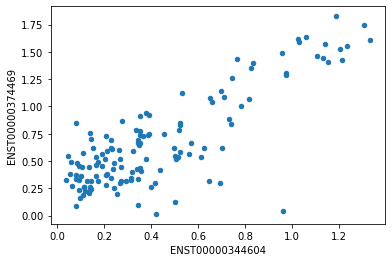

In [76]:
fib.plot.scatter('ENST00000344604','ENST00000374469')

In [77]:
fib.loc['125_71yr_Female_Caucasian'][['ENST00000344604','ENST00000374469']]

Transcript stable ID
ENST00000344604    0.661339
ENST00000374469    1.040761
Name: 125_71yr_Female_Caucasian, dtype: float64

In [78]:
fib['age_group']=pd.qcut(fib.age,3)

In [79]:
data=fib[['ENST00000343267','age_group']]
data.loc[len(data.index)]=[0,'stem']

/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [80]:
fl=fib[fib.age<fib.age.quantile(1/3)].median()
fh=fib[fib.age>fib.age.quantile(2/3)].median()
fm=fib.median()
df=pd.concat([fl,fm,fh],1)
df.columns=['low','mid','high']

In [81]:
df.shape

(11734, 3)

In [82]:
#df=df.drop(df.drop('age')[((df.drop('age').high-df.drop('age').low)>-.1) & ((df.drop('age').high-df.drop('age').low)<.1)].index)

In [83]:
h1=pd.read_table('../data/rna/h1.txt')
h1.index=h1.Name.str.split('.').str[0]

In [84]:
h9=pd.read_table('../data/rna/h9.txt')
h9.index=h9.Name.str.split('.').str[0]

In [85]:
h1['h1']=h1.TPM
h9['h9']=h9.TPM
h=h1.merge(h9,left_index=True, right_index=True)

<AxesSubplot:xlabel='h1', ylabel='h9'>

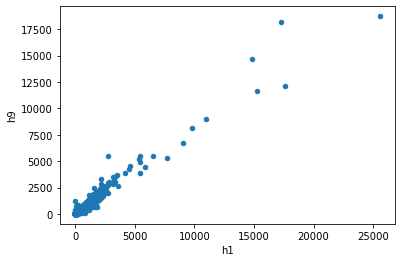

In [86]:
h.plot.scatter('h1','h9')

<AxesSubplot:xlabel='h1', ylabel='h9'>

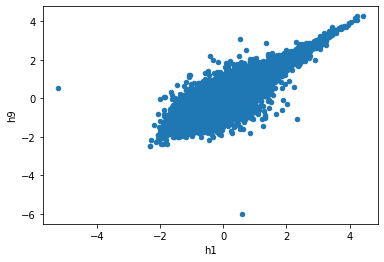

In [87]:
np.log10(h[['h1','h9']]).plot.scatter('h1','h9')

In [88]:
h['TPM']=h[['h1','h9']].mean(1)

In [89]:
cor=fib.corrwith(fib.age,method='spearman')
fib=df.drop('age')

In [90]:
fib=fib.loc[fib.index.intersection(h.index)]

In [91]:
fib['h']=np.log10(h.loc[fib.index].TPM+1)

In [92]:
cor.sort_values()

Transcript stable ID
ENST00000422318   -0.711841
ENST00000319006   -0.702226
ENST00000398606   -0.672465
ENST00000246166   -0.646827
ENST00000184266   -0.639096
                     ...   
ENST00000343267    0.645769
ENST00000251810    0.647032
ENST00000295317    0.652363
ENST00000369985    0.703582
age                1.000000
Length: 11734, dtype: float64

<AxesSubplot:>

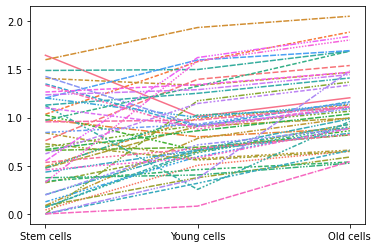

In [93]:
data=fib.loc[cor[cor.index.intersection(fib.index)].sort_values().dropna().tail(50).index][['h','low','high']]
data.columns=['Stem cells','Young cells','Old cells']
sn.lineplot(data=data.T,legend=False)

In [94]:
data['d']=data['Old cells']-data['Young cells']
data.sort_values('d',ascending=False)

,Stem cells,Young cells,Old cells,d
Transcript stable ID,,,,
ENST00000372868,0.000000,0.366983,1.485324,1.118341
ENST00000514985,1.124449,0.254790,0.960628,0.705838
ENST00000343267,0.000000,0.080987,0.542470,0.461483
ENST00000318217,0.971491,1.325639,1.689793,0.364155
ENST00000355622,0.000000,0.318063,0.659552,0.341489
ENST00000419395,0.199932,0.669131,0.986167,0.317036
ENST00000278407,1.034339,1.580993,1.887578,0.306584
ENST00000342697,0.458183,0.582745,0.886311,0.303566
ENST00000394236,0.125761,0.594614,0.890672,0.296059


<AxesSubplot:>

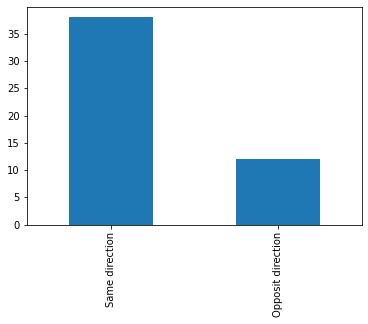

In [95]:
data=fib.loc[cor[cor.index.intersection(fib.index)].sort_values().dropna().tail(50).index]
data['Same direction']=data['h']<data['mid']
data['Opposit direction']=data['h']>data['mid']
data.sum()[['Same direction','Opposit direction']].plot(kind='bar')

<AxesSubplot:>

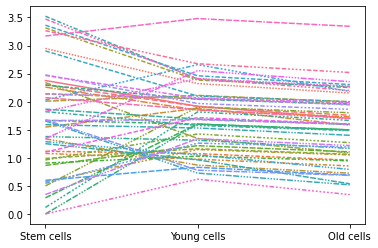

In [96]:
data=fib.loc[cor[cor.index.intersection(fib.index)].sort_values().dropna().head(50).index][['h','low','high']]
data.columns=['Stem cells','Young cells','Old cells']
sn.lineplot(data=data.T,legend=False)

<AxesSubplot:>

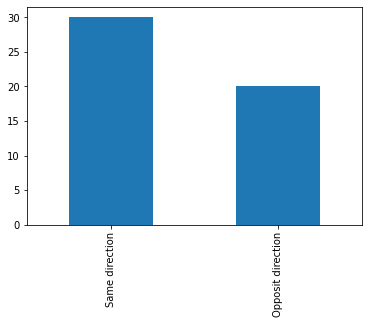

In [97]:
data=fib.loc[cor[cor.index.intersection(fib.index)].sort_values().dropna().head(50).index]
data['Opposit direction']=data['h']<data['mid']
data['Same direction']=data['h']>data['mid']
data.sum()[['Same direction','Opposit direction']].plot(kind='bar')

In [98]:
fib

,low,mid,high,h
Transcript stable ID,,,,
ENST00000265343,1.235680,1.276094,1.317362,1.335912
ENST00000563169,0.823279,0.842672,0.882701,0.078783
ENST00000254846,0.429429,0.413803,0.370598,0.933032
ENST00000369305,0.488692,0.466571,0.411618,0.794582
ENST00000388955,0.391464,0.360215,0.331731,0.669028
...,...,...,...,...
ENST00000380379,0.728597,0.739335,0.767823,0.937971
ENST00000317623,1.198327,1.225568,1.248031,0.000000
ENST00000502653,0.822299,0.822299,0.817101,0.575727


In [99]:
ref=pd.read_table('../data/rna/refseq.txt',index_col=0)
ref['ref']=(ref['RefSeq mRNA ID'].astype(str)+ref['RefSeq ncRNA ID'].astype(str))
ref['ref']=ref.ref.str.strip('nan')
ref=ref[ref.ref!='']

In [115]:
fib[fib.index.isin(ref[ref['Gene name']=='IL7R'].index)]

,low,mid,high,h
Transcript stable ID,,,,
ENST00000514217,1.180671,1.180671,1.180152,0.0
